
# Creating a map with contour lines

Plotting a contour map is handled by :meth:`pygmt.Figure.grdcontour`.


In [ ]:
import pygmt

# Load sample earth relief data
grid = pygmt.datasets.load_earth_relief(
    resolution="03s",
    region=[-63.0, -62.0, 16.0, 17.0],
    registration="gridline",
    use_srtm=True,
)


## Create contour plot

The :meth:`pygmt.Figure.grdcontour` method takes the grid input.
It plots annotated contour lines, which are thicker and have the
elevation/depth written on them, and unannotated contour lines.
In the example below, the default contour line intervals are 500 meters,
with an annotated contour line every 1,000 meters.
By default, it plots the map with the
equidistant cylindrical projection and with no frame.



In [ ]:
fig = pygmt.Figure()
fig.grdcontour(grid=grid)
fig.show()

## Contour line settings

Use the ``annotation`` and ``interval`` parameters to adjust contour line
intervals. In the example below, there are contour intervals every 250 meters
and annotated contour lines every 1,000 meters.



In [ ]:
fig = pygmt.Figure()
fig.grdcontour(
    annotation=1000,
    interval=250,
    grid=grid,
)
fig.show()

## Contour limits

The ``limit`` parameter sets the minimum and maximum values for the contour
lines. The parameter takes the low and high values, and is either a list (as
below) or a string ``limit="-4000/-2000"``.



In [ ]:
fig = pygmt.Figure()
fig.grdcontour(
    annotation=1000,
    interval=250,
    grid=grid,
    limit=[-4000, -2000],
)
fig.show()

## Map settings

The :meth:`pygmt.Figure.grdcontour` method accepts additional parameters,
including setting the projection and frame.



In [ ]:
fig = pygmt.Figure()
fig.grdcontour(
    annotation=1000,
    interval=250,
    grid=grid,
    limit=[-4000, -2000],
    projection="M10c",
    frame=True,
)
fig.show()

## Adding a colormap

The :meth:`pygmt.Figure.grdimage` method can be used to add a
colormap to the contour map. It must be called prior to
:meth:`pygmt.Figure.grdcontour` to keep the contour lines visible on the
final map. If the ``projection`` parameter is specified in the
:meth:`pygmt.Figure.grdimage` method, it does not need to be repeated in the
:meth:`pygmt.Figure.grdcontour` method. Finally, a colorbar is added using
the :meth:`pygmt.Figure.colorbar` method.



In [ ]:
fig = pygmt.Figure()
fig.grdimage(
    grid=grid,
    cmap="haxby",
    projection="M10c",
    frame=True,
)
fig.grdcontour(
    annotation=1000,
    interval=250,
    grid=grid,
    limit=[-4000, -2000],
)
fig.colorbar(frame=["x+lelevation", "y+lm"])
fig.show()

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.5.5 at 30x30 arc seconds reduced by Gaussian Cartesian filtering (2.6 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 15x15 degree grid tile (earth_relief_30s_p): N00E060


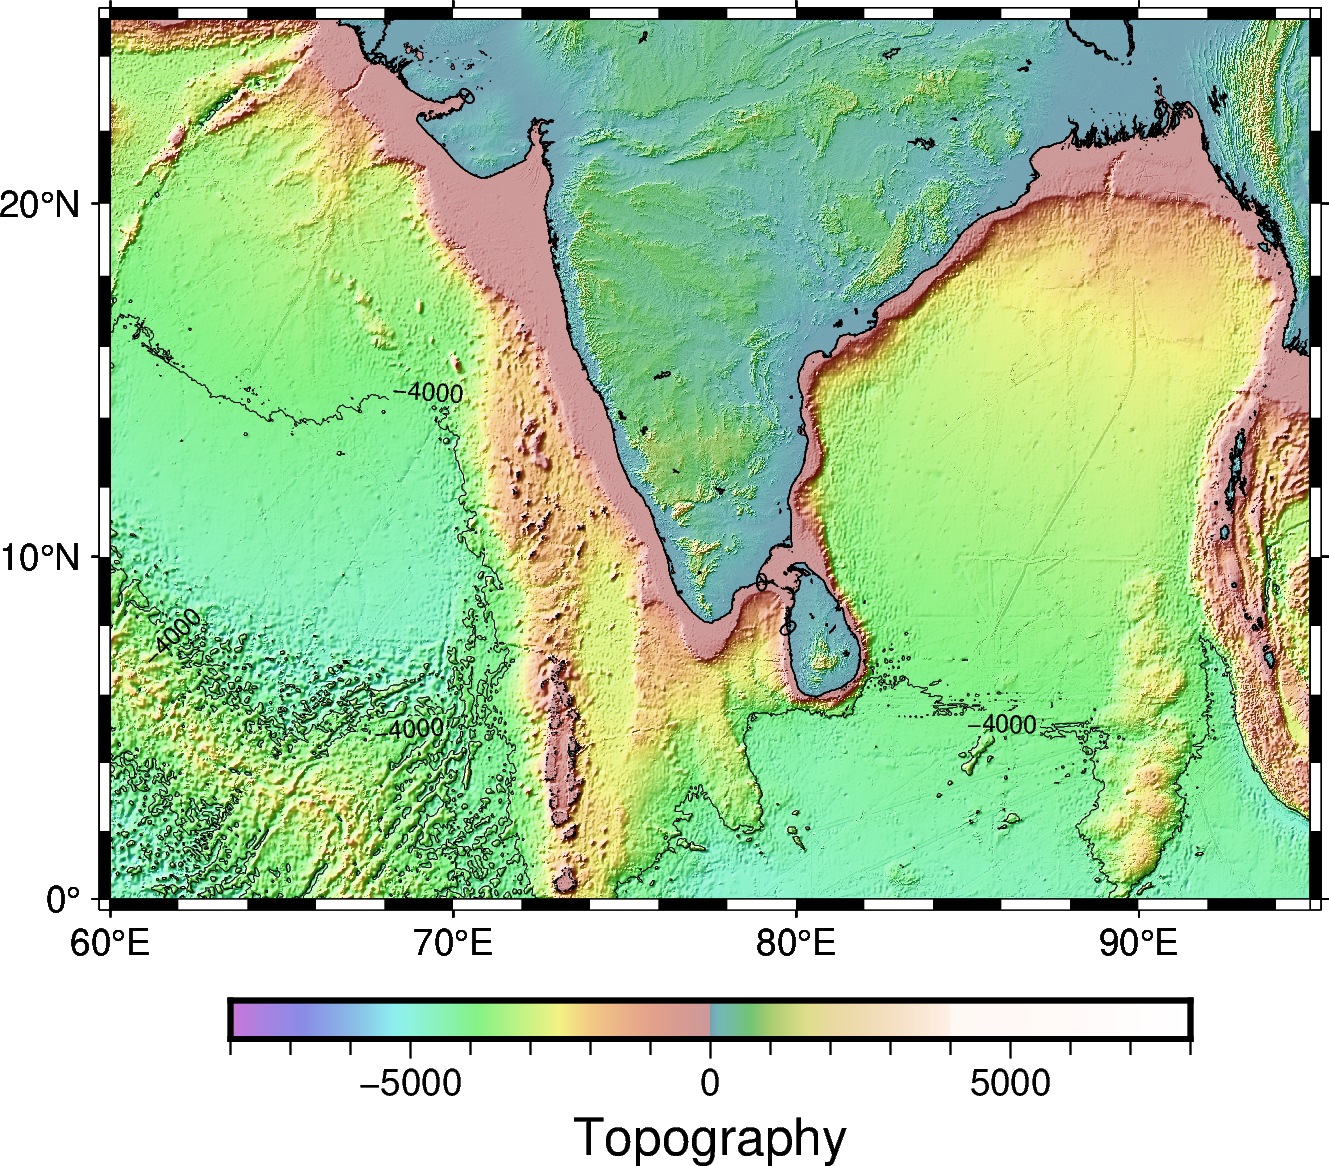

In [2]:
import pygmt
#define etopo data file
# topo_data = 'path_to_local_data_file'
topo_data = '@earth_relief_30s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)
# topo_data = '@earth_relief_15s' #15 arc second global relief (SRTM15+V2.1)
# topo_data = '@earth_relief_03s' #3 arc second global relief (SRTM3S)

# define plot geographical range
minlon, maxlon = 60, 95
minlat, maxlat = 0, 25

# Visualization
fig = pygmt.Figure()

# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)

# plot high res topography
fig.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading=True,
    frame=True
    )

# plot continents, shorelines, rivers, and borders
fig.coast(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shorelines=True,
    frame=True
    )

# plot the topographic contour lines
fig.grdcontour(
    grid=topo_data,
    interval=4000,
    annotation="4000+f6p",
    limit="-8000/0", #to only display it below 
    pen="a0.15p"
    )

# Plot colorbar
fig.colorbar(
    frame='+l"Topography"',
#     position="x11.5c/6.6c+w6c+jTC+v" #for vertical colorbar
    )

# save figure
save_fig = 0
if not save_fig:
    fig.show() 
    #fig.show(method='external') #open with the default pdf reader
else:
    fig.savefig("topo-plot.png", crop=True, dpi=300, transparent=True)
#     fig.savefig("topo-plot.pdf", crop=True, dpi=720)
    print('Figure saved!')

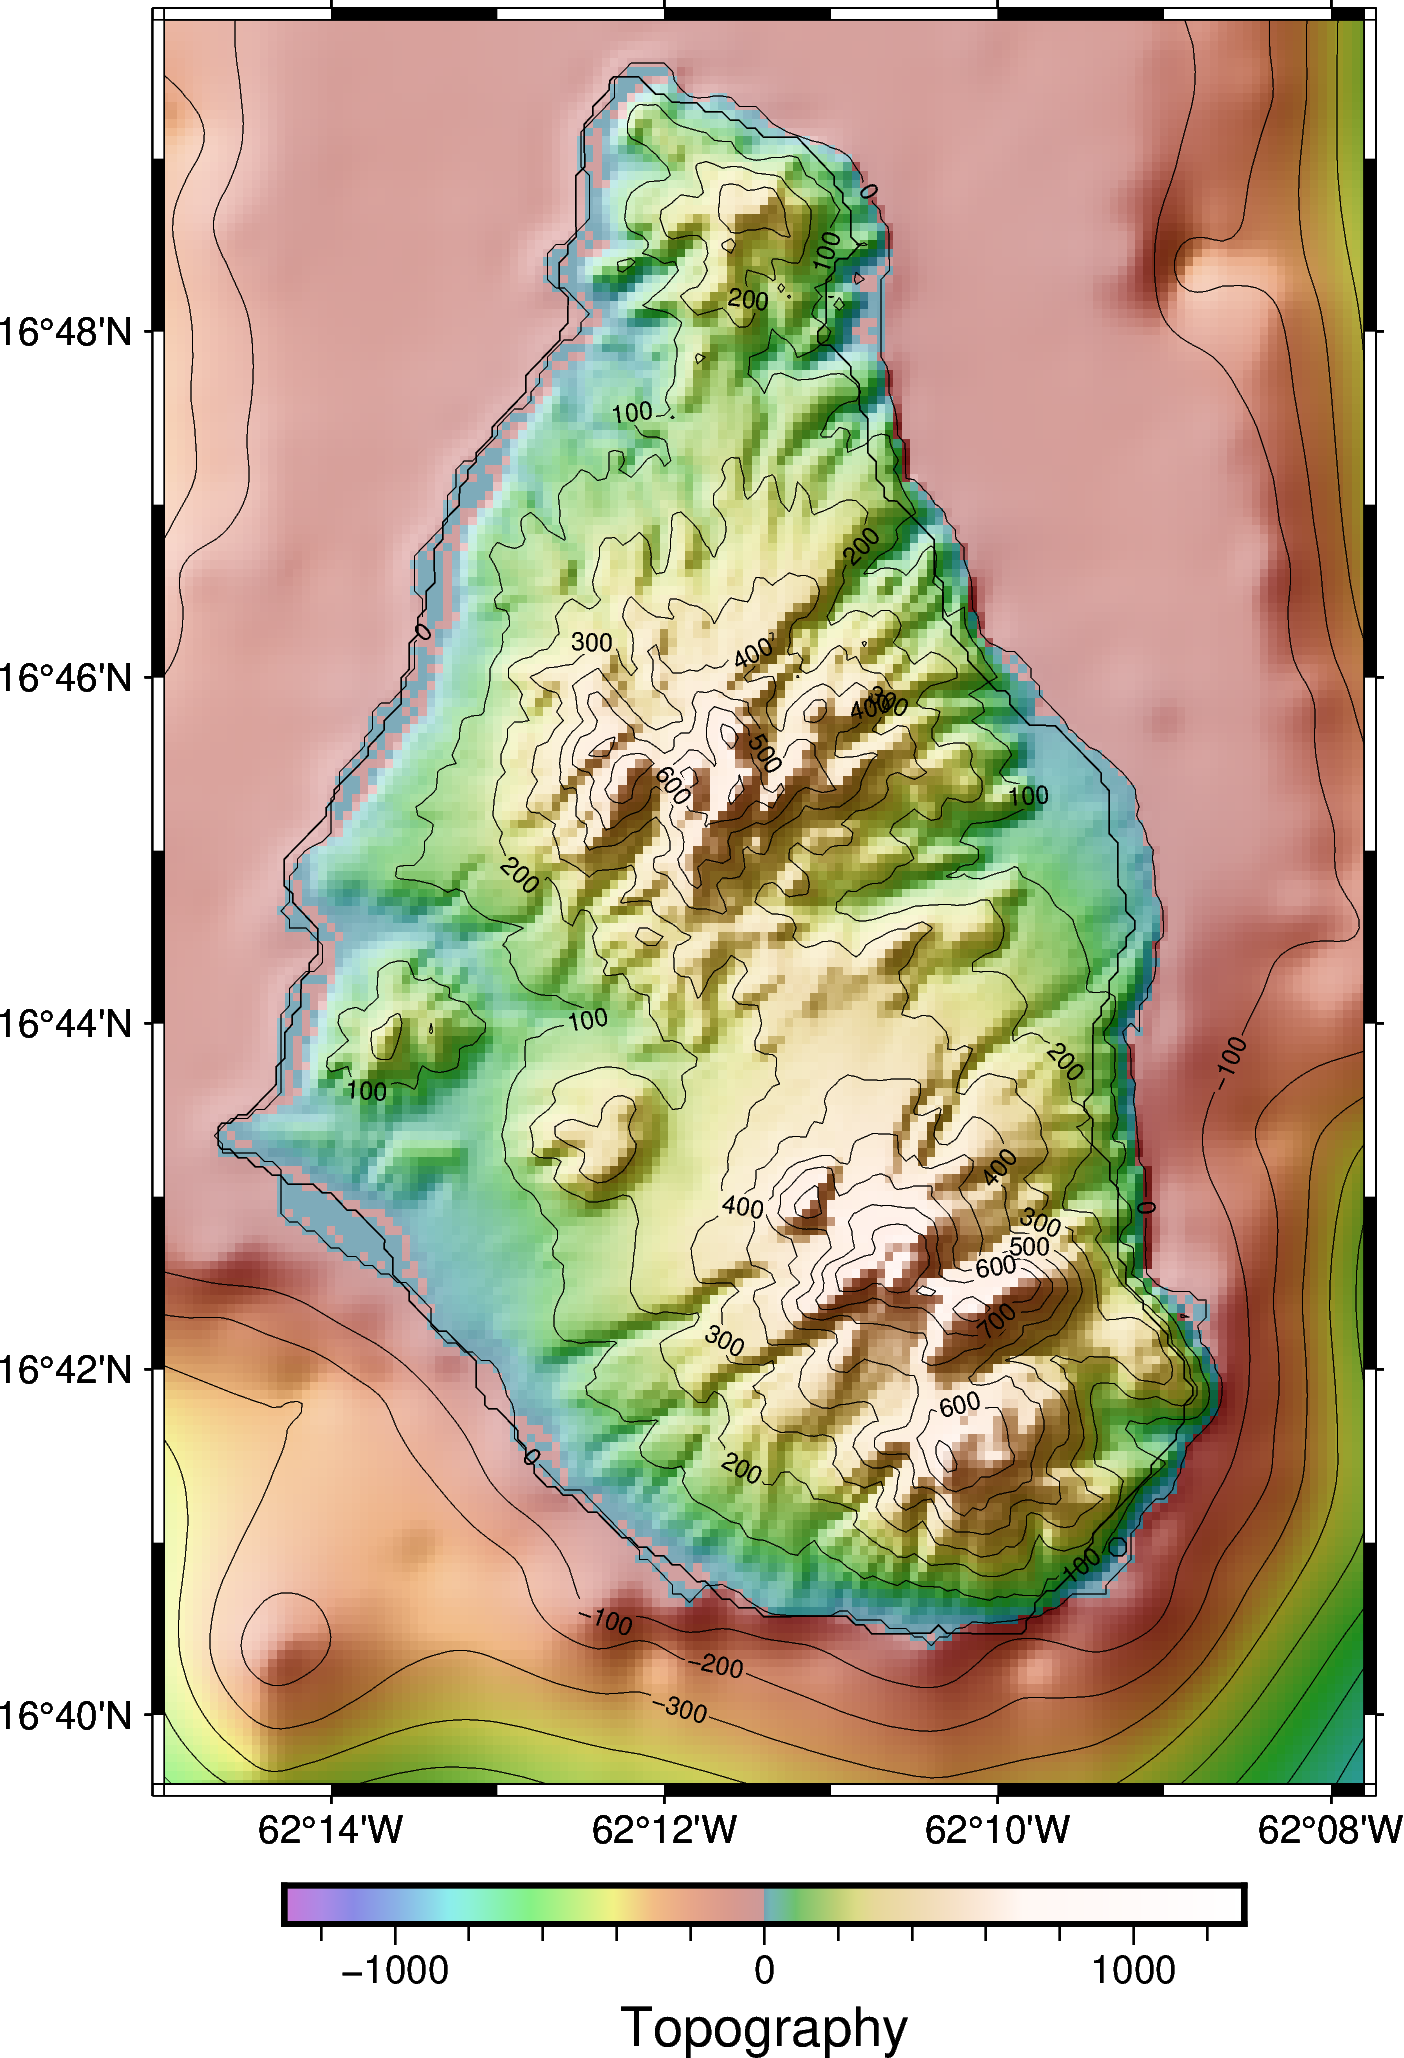

In [8]:
#define etopo data file
# topo_data = 'path_to_local_data_file'
#topo_data = '@earth_relief_30s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)
# topo_data = '@earth_relief_15s' #15 arc second global relief (SRTM15+V2.1)
topo_data = '@earth_relief_03s' #3 arc second global relief (SRTM3S)

# define plot geographical range
minlon, maxlon = -62.25, -62.13
minlat, maxlat = 16.66, 16.83

# Visualization
fig = pygmt.Figure()

# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='-1300/1300/100',
    continuous=True
)

# plot high res topography
fig.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading=True,
    frame=True
    )

# plot continents, shorelines, rivers, and borders
fig.coast(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shorelines=True,
    frame=True
    )

# plot the topographic contour lines
fig.grdcontour(
    grid=topo_data,
    interval=100,
    annotation="100+f6p",
    limit="-1300/1300", #to only display it below 
    pen="a0.15p"
    )

# Plot colorbar
fig.colorbar(
    frame='+l"Topography"',
#     position="x11.5c/6.6c+w6c+jTC+v" #for vertical colorbar
    )

# save figure
save_fig = 0
if not save_fig:
    fig.show() 
    #fig.show(method='external') #open with the default pdf reader
else:
    fig.savefig("topo-plot.png", crop=True, dpi=300, transparent=True)
#     fig.savefig("topo-plot.pdf", crop=True, dpi=720)
    print('Figure saved!')